In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.parameters import ANIMALS

import logging
logging.basicConfig(level=logging.INFO)


from loren_frank_data_processing import make_neuron_dataframe


neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info.head()

area       csi  meanrate  \
animal day epoch tetrode_number neuron_number                            
HPa    1   1     1              1              CA1  0.193443  0.248777   
                                2              CA1  0.145800  0.257341   
                                3              CA1  0.083871  0.189641   
                                4              CA1  0.165342  0.256525   
                                5              CA1  0.090365  0.613785   

                                                       neuron_id  numspikes  \
animal day epoch tetrode_number neuron_number                                 
HPa    1   1     1              1              HPa_01_01_001_001      610.0   
                                2              HPa_01_01_001_002      631.0   
                                3              HPa_01_01_001_003      465.0   
                                4              HPa_01_01_001_004      629.0   
                                5              HPa_01_01_001_005     1505.0   

                                               propbursts  spikewidth  
animal day epoch tetrode_number neuron_number                          
HPa    1   1     1              1                0.421311    8.404000  
                                2                0.334390   10.068208  
                                3                0.253763   10.591460  
                                4                0.392687    9.563608  
                                5                0.297010   11.086349

In [3]:
ripple_models = ['ripple/constant', 'ripple/over_time', 'ripple/replay_state', 'ripple/session_time']

In [3]:
def plot_best_AIC(models, neuron_info, is_percentage=True):
    AIC = xr.concat([
        xr.open_mfdataset('../Processed-Data/*.nc', group=model, concat_dim='neuron_id').AIC
        for model in models
    ], dim=pd.Index(models, name='model'))

    best_AIC = pd.DataFrame(
        AIC.model[np.argmin(AIC.values, axis=0)].values,
        index=AIC.neuron_id, columns=['model'])
    best_AIC = pd.merge(best_AIC.reset_index(), neuron_info, on='neuron_id')
    
    if is_percentage:
        prop_df = (best_AIC['model']
               .groupby(best_AIC['area'])
               .value_counts(normalize=True)
               .rename('percentage')
               .reset_index())
        
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        sns.barplot(x='area', y='percentage', hue='model', data=prop_df, ax=ax,
                   hue_order=models)
    else:
        sns.factorplot(
            x='area', hue='model', data=best_AIC, kind='count', size=6, aspect=1.5,
            hue_order=models);

    

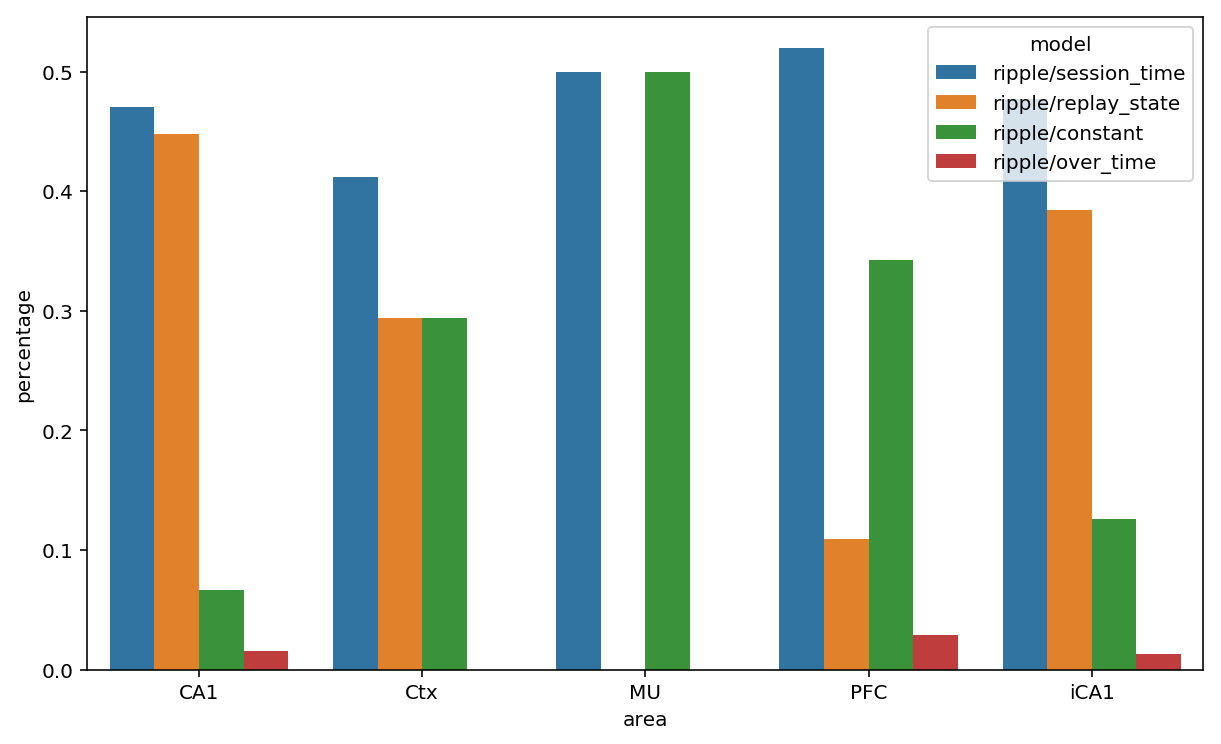

In [ ]:
plot_best_AIC(ripple_models, neuron_info)

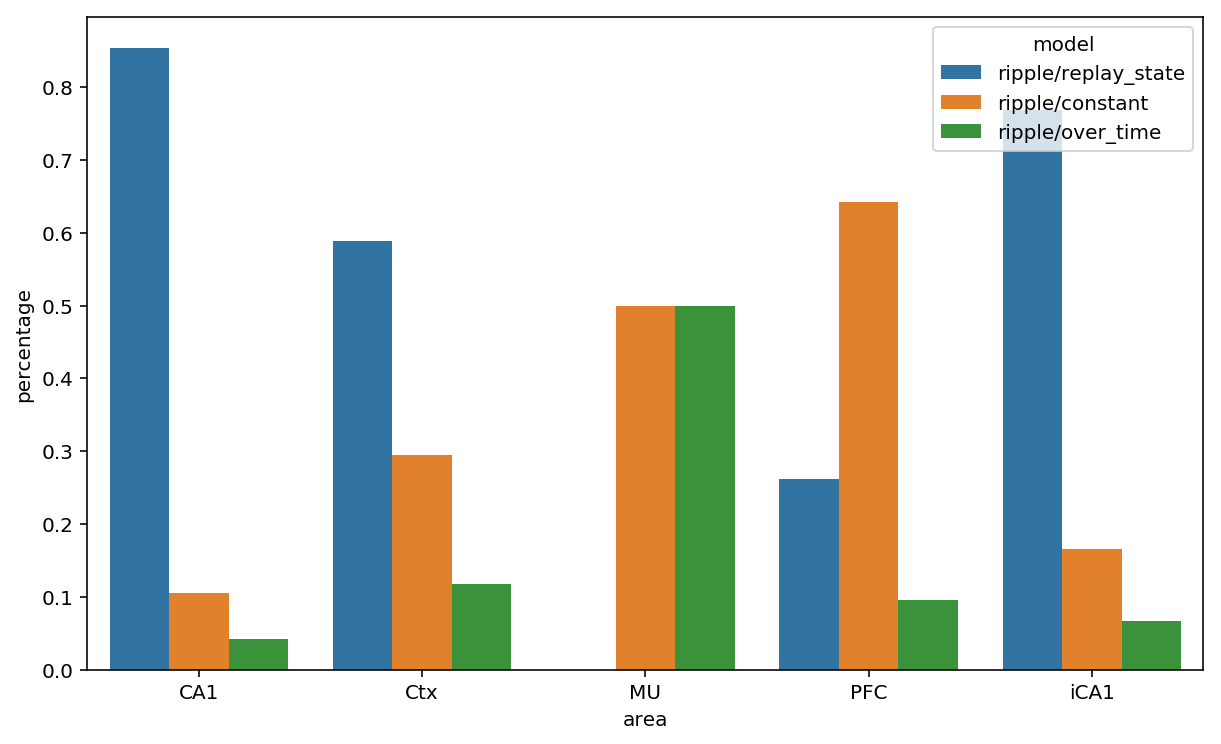

In [6]:
plot_best_AIC(ripple_models[:3], neuron_info)

In [7]:
non_ripple_models = [
    'non_ripple/constant_model', 'non_ripple/task_model', 'non_ripple/turn_model',
    'non_ripple/task_by_turn_model', 'non_ripple/1D_position_model',
    'non_ripple/1D_position_by_task_model', 'non_ripple/1D_position_by_speed_model',
    'non_ripple/1D_position_by_speed_and_task_model', 'non_ripple/1D_position_by_speed_by_task_model',
]

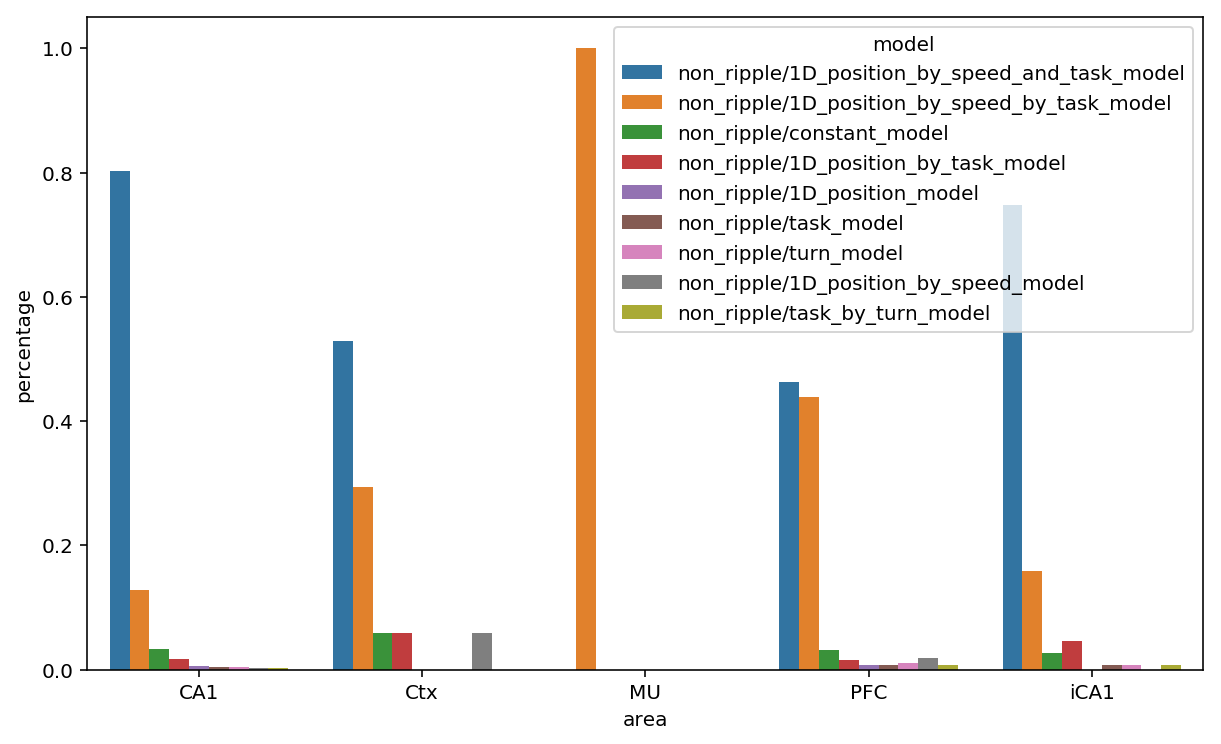

In [5]:
plot_best_AIC(non_ripple_models, neuron_info)

In [4]:
non_ripple_models_2D = [
    'non_ripple/2D_position_model',
    'non_ripple/2D_position_by_task_model',
    'non_ripple/2D_position_by_speed_model',
    'non_ripple/2D_position_by_speed_and_task_model',
]

In [7]:
plot_best_AIC(non_ripple_models_2D, neuron_info)

OSError: [Errno group not found: 2D_position_model] '2D_position_model'

In [5]:
from loren_frank_data_processing import make_epochs_dataframe

epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info.head()

environment   type  exposure
animal day epoch                             
HPa    1   1        presleep  sleep       NaN
           2             lin    run       1.0
           3             nan   rest       NaN
           4            wtr1    run       1.0
           5             nan   rest       NaN

In [8]:
models = ripple_models.copy()

AIC = xr.concat([
    xr.open_mfdataset('../Processed-Data/*.nc', group=model, concat_dim='neuron_id').AIC
    for model in models
], dim=pd.Index(models, name='model'))

best_AIC = pd.DataFrame(
    AIC.model[np.argmin(AIC.values, axis=0)].values,
    index=AIC.neuron_id, columns=['model'])
best_AIC = pd.merge(best_AIC.reset_index(), neuron_info.reset_index(), on='neuron_id')

In [9]:
best_AIC.head()

,neuron_id,model,animal,day,epoch,tetrode_number,neuron_number,area,csi,meanrate,numspikes,propbursts,spikewidth
0,HPa_01_04_001_001,ripple/session_time,HPa,1,4,1,1,CA1,0.151637,1.431743,1741.0,0.484779,8.404000
1,HPa_01_04_001_002,ripple/replay_state,HPa,1,4,1,2,CA1,0.153681,3.060855,3722.0,0.535465,10.068208
2,HPa_01_04_001_003,ripple/replay_state,HPa,1,4,1,3,CA1,0.064854,0.786184,956.0,0.258368,10.591460
3,HPa_01_04_001_004,ripple/session_time,HPa,1,4,1,4,CA1,0.123684,0.312500,380.0,0.413158,9.563608
4,HPa_01_04_001_005,ripple/replay_state,HPa,1,4,1,5,CA1,0.079599,3.285362,3995.0,0.300375,11.086349


In [12]:
best_AIC = pd.merge(best_AIC, epoch_info.reset_index(), on=['animal', 'day', 'epoch'])
best_AIC.head()

,neuron_id,model,animal,day,epoch,tetrode_number,neuron_number,area,csi,meanrate,numspikes,propbursts,spikewidth,environment,type,exposure
0,HPa_01_04_001_001,ripple/session_time,HPa,1,4,1,1,CA1,0.151637,1.431743,1741.0,0.484779,8.404000,wtr1,run,1.0
1,HPa_01_04_001_002,ripple/replay_state,HPa,1,4,1,2,CA1,0.153681,3.060855,3722.0,0.535465,10.068208,wtr1,run,1.0
2,HPa_01_04_001_003,ripple/replay_state,HPa,1,4,1,3,CA1,0.064854,0.786184,956.0,0.258368,10.591460,wtr1,run,1.0
3,HPa_01_04_001_004,ripple/session_time,HPa,1,4,1,4,CA1,0.123684,0.312500,380.0,0.413158,9.563608,wtr1,run,1.0
4,HPa_01_04_001_005,ripple/replay_state,HPa,1,4,1,5,CA1,0.079599,3.285362,3995.0,0.300375,11.086349,wtr1,run,1.0


In [18]:
exposure = pd.qcut(best_AIC.exposure, [0, .33, .66, 1], labels=['early', 'middle', 'late'])

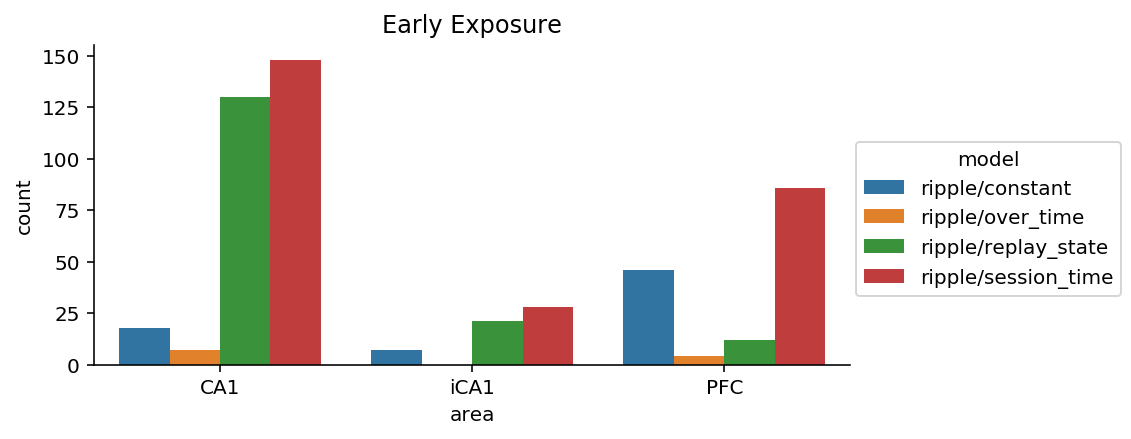

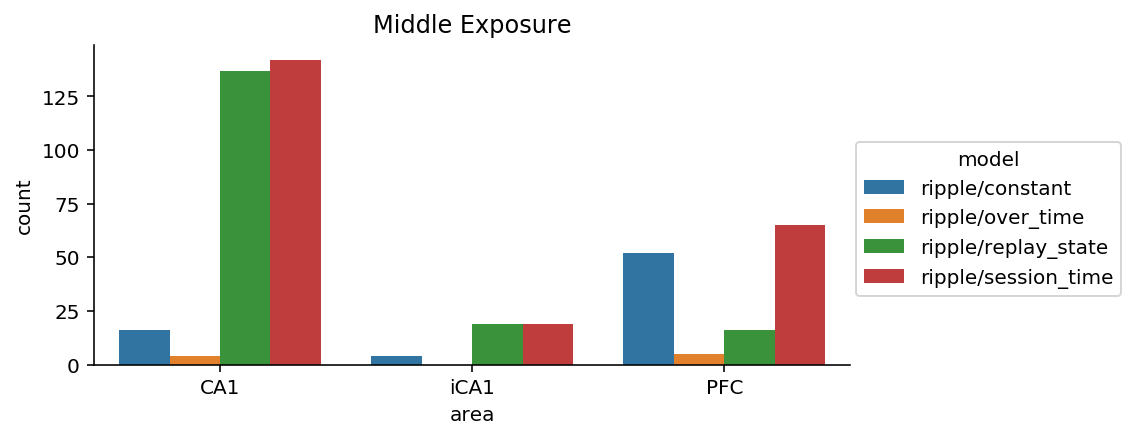

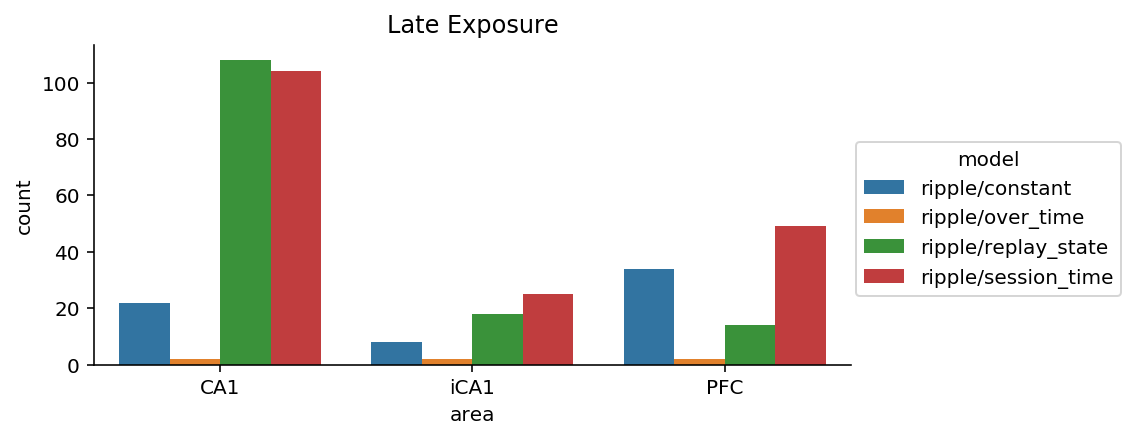

In [34]:
is_area = best_AIC.area.isin(['CA1', 'PFC', 'iCA1'])

h = sns.factorplot(
    x='area', hue='model', data=best_AIC[(exposure == 'early') & is_area], kind='count', size=3, aspect=2,
    hue_order=models);
h.ax.set_title('Early Exposure')

h = sns.factorplot(
    x='area', hue='model', data=best_AIC[(exposure == 'middle') & is_area], kind='count', size=3, aspect=2,
    hue_order=models);
h.ax.set_title('Middle Exposure')

h = sns.factorplot(
    x='area', hue='model', data=best_AIC[(exposure == 'late') & is_area], kind='count', size=3, aspect=2,
    hue_order=models);
h.ax.set_title('Late Exposure');

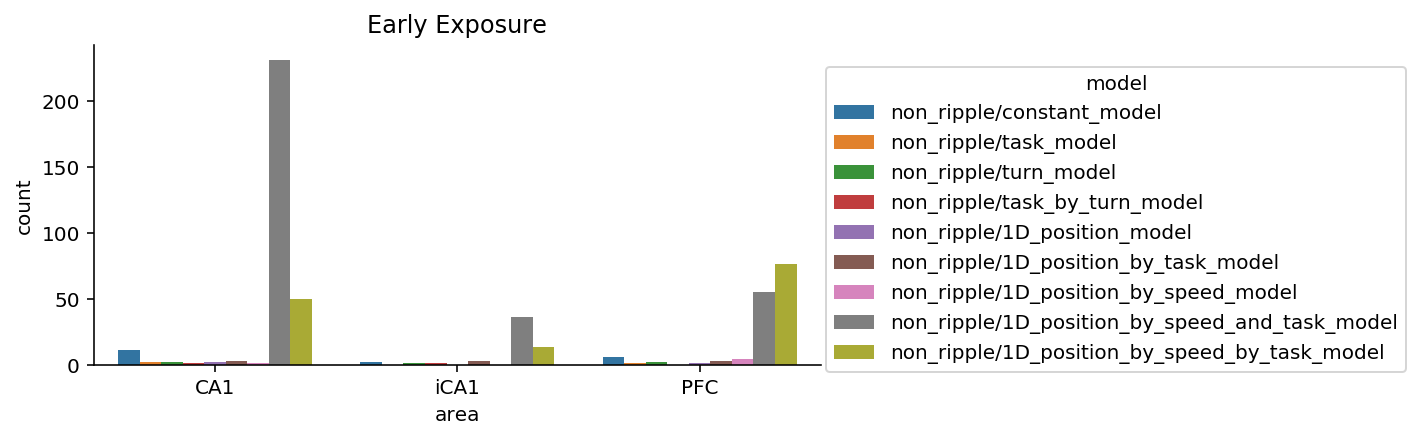

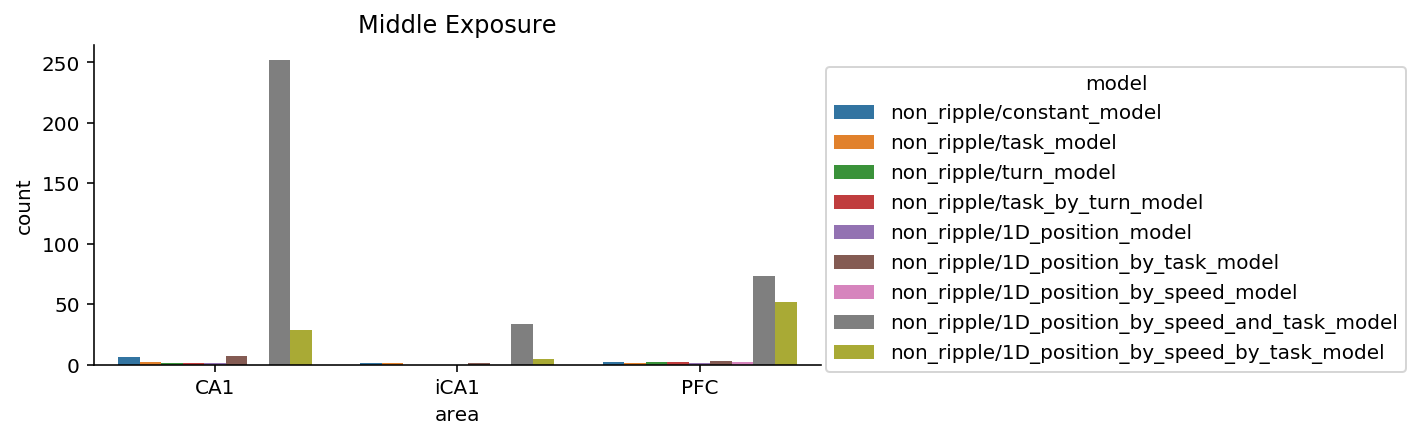

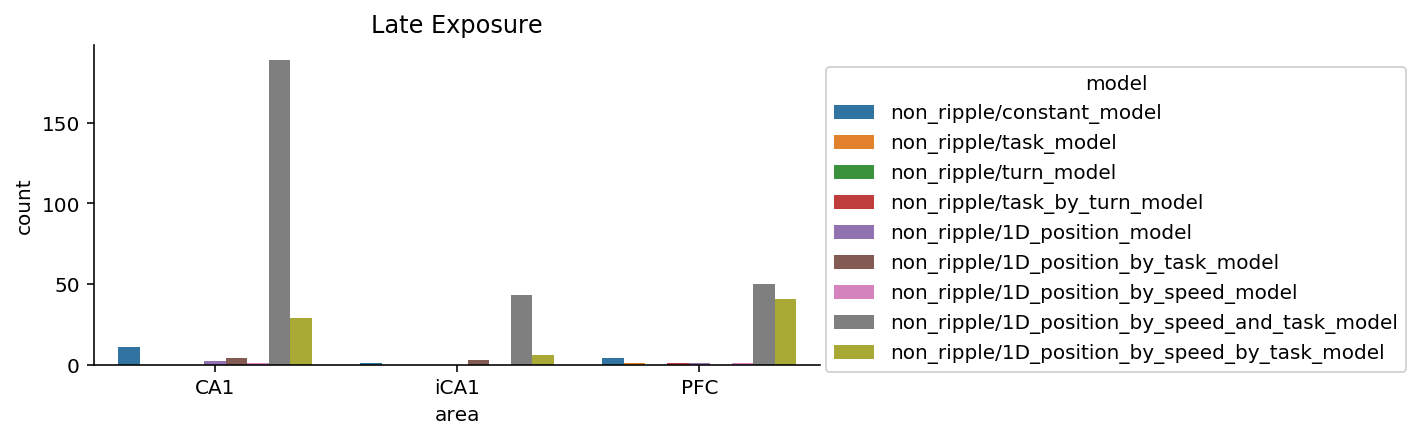

In [14]:
models = non_ripple_models.copy()

AIC = xr.concat([
    xr.open_mfdataset('../Processed-Data/*.nc', group=model, concat_dim='neuron_id').AIC
    for model in models
], dim=pd.Index(models, name='model'))

best_AIC = pd.DataFrame(
    AIC.model[np.argmin(AIC.values, axis=0)].values,
    index=AIC.neuron_id, columns=['model'])
best_AIC = pd.merge(best_AIC.reset_index(), neuron_info.reset_index(), on='neuron_id')
best_AIC = pd.merge(best_AIC, epoch_info.reset_index(), on=['animal', 'day', 'epoch'])

exposure = pd.qcut(best_AIC.exposure, [0, .33, .66, 1], labels=['early', 'middle', 'late'])

is_area = best_AIC.area.isin(['CA1', 'PFC', 'iCA1'])

h = sns.factorplot(
    x='area', hue='model', data=best_AIC[(exposure == 'early') & is_area], kind='count', size=3, aspect=2,
    hue_order=models);
h.ax.set_title('Early Exposure')

h = sns.factorplot(
    x='area', hue='model', data=best_AIC[(exposure == 'middle') & is_area], kind='count', size=3, aspect=2,
    hue_order=models);
h.ax.set_title('Middle Exposure')

h = sns.factorplot(
    x='area', hue='model', data=best_AIC[(exposure == 'late') & is_area], kind='count', size=3, aspect=2,
    hue_order=models);
h.ax.set_title('Late Exposure');

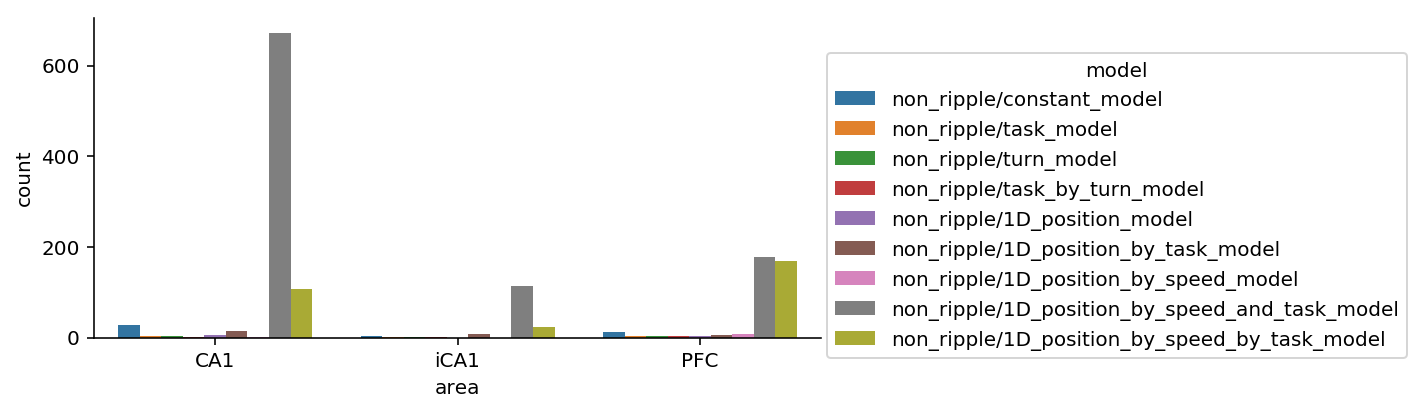

In [15]:
h = sns.factorplot(
    x='area', hue='model', data=best_AIC[is_area], kind='count', size=3, aspect=2,
    hue_order=models);

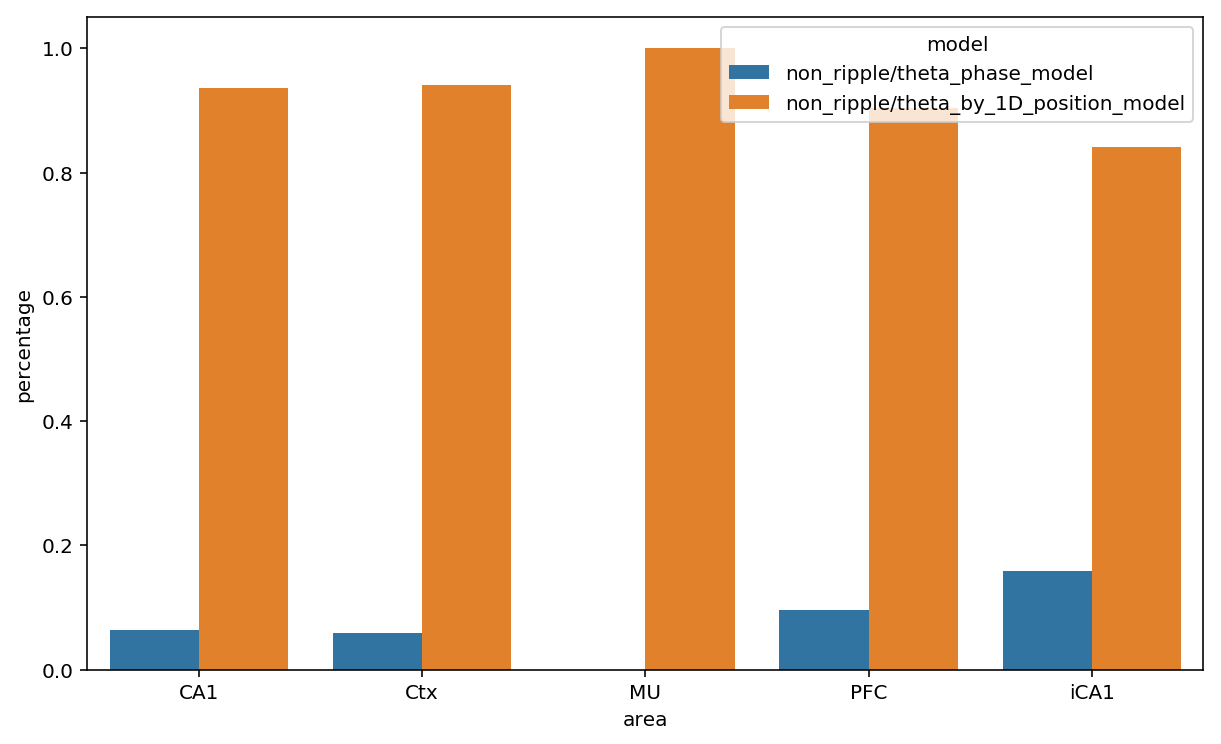

In [4]:
theta_models = [
    'non_ripple/theta_phase_model',
    'non_ripple/theta_by_1D_position_model',
]
plot_best_AIC(theta_models, neuron_info)

In [4]:
theta_phase = xr.open_mfdataset('../Processed-Data/*.nc', group='non_ripple/theta_phase_model', concat_dim='neuron_id')
theta_phase

<xarray.Dataset>
Dimensions:               (dim_0: 1, instantaneous_phase: 50, neuron_id: 1393)
Coordinates:
  * instantaneous_phase   (instantaneous_phase) float64 -3.142 -3.013 -2.885 ...
  * neuron_id             (neuron_id) object 'HPa_01_04_001_001' ...
Dimensions without coordinates: dim_0
Data variables:
    firing_rate           (neuron_id, instantaneous_phase) float64 dask.array<shape=(1393, 50), chunksize=(29, 50)>
    preferred_phase       (neuron_id, dim_0) float64 dask.array<shape=(1393, 1), chunksize=(29, 1)>
    modulation            (neuron_id, dim_0) float64 dask.array<shape=(1393, 1), chunksize=(29, 1)>
    baseline_firing_rate  (neuron_id, dim_0) float64 dask.array<shape=(1393, 1), chunksize=(29, 1)>
    AIC                   (neuron_id) float64 dask.array<shape=(1393,), chunksize=(29,)>
    ks_statistic          (neuron_id) float64 dask.array<shape=(1393,), chunksize=(29,)>

In [14]:
coherency = (theta_phase.modulation * np.exp(1j * theta_phase.preferred_phase)).squeeze().rename('coherency')
coherency

<xarray.DataArray 'coherency' (neuron_id: 1393)>
dask.array<shape=(1393,), dtype=complex128, chunksize=(29,)>
Coordinates:
  * neuron_id  (neuron_id) object 'HPa_01_04_001_001' 'HPa_01_04_001_002' ...

In [17]:
phase = pd.merge(coherency.to_dataframe().reset_index(), neuron_info, on='neuron_id')
phase.head()

,neuron_id,coherency,area,csi,meanrate,numspikes,propbursts,spikewidth
0,HPa_01_04_001_001,(0.144760842653+0.0779829878711j),CA1,0.151637,1.431743,1741.0,0.484779,8.404000
1,HPa_01_04_001_002,(0.0593605007745+0.575151752525j),CA1,0.153681,3.060855,3722.0,0.535465,10.068208
2,HPa_01_04_001_003,(0.0756375478928+0.0833906354166j),CA1,0.064854,0.786184,956.0,0.258368,10.591460
3,HPa_01_04_001_004,(0.0456803960651+0.266965030569j),CA1,0.123684,0.312500,380.0,0.413158,9.563608
4,HPa_01_04_001_005,(0.231984793766+0.100235530288j),CA1,0.079599,3.285362,3995.0,0.300375,11.086349


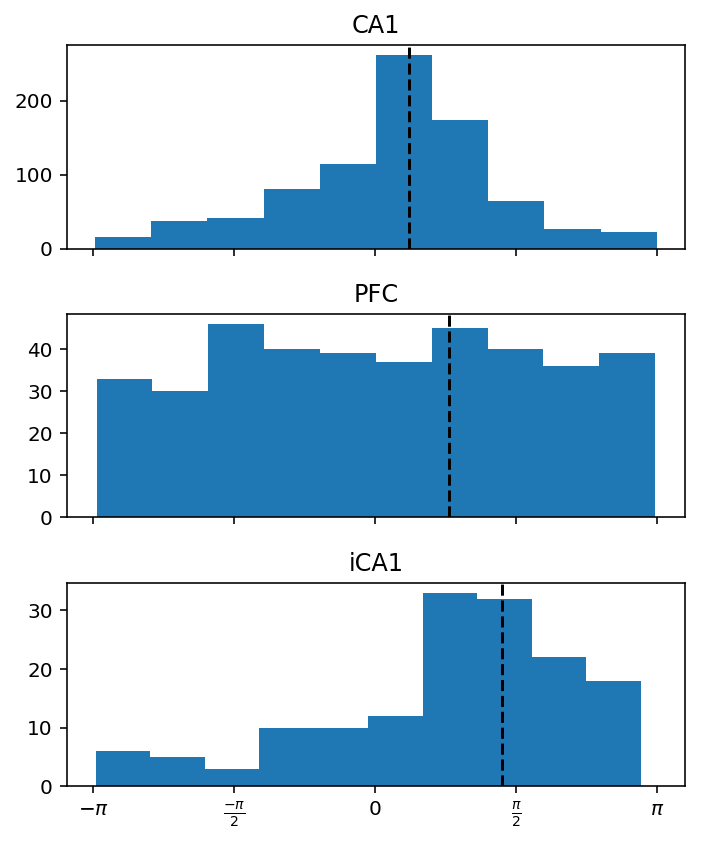

In [35]:
is_area = phase.area.isin(['CA1', 'iCA1', 'PFC'])

n_areas = len(phase[is_area].area.unique())
fig, axes = plt.subplots(n_areas, 1, sharex=True, figsize=(5, n_areas * 2))

for ax, (name, df) in zip(axes, phase[is_area].groupby('area').coherency):
    ax.hist(np.angle(df.values))
    ax.axvline(np.angle(np.mean(df.values)), color='black', linestyle='--')
    ax.set_title(name)
    
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$\frac{-\pi}{2}$', '0', r'$\frac{\pi}{2}$', '$\pi$'])
plt.tight_layout()

## Spike-Spike Coherence

In [ ]:
spike_coherence = xr.open_mfdataset(
    '../Processed-Data/*.nc',
    group='ripple/spike_spike_coherence',
    concat_dim='session')
spike_coherence

<xarray.Dataset>
Dimensions:               (frequency: 188, neuron1: 1393, neuron2: 1393, session: 48, time: 2)
Coordinates:
  * neuron1               (neuron1) object 'HPa_01_04_001_001' ...
  * neuron2               (neuron2) object 'HPa_01_04_001_001' ...
  * time                  (time) float64 0.125 0.375
  * frequency             (frequency) float64 0.0 4.0 8.0 12.0 16.0 20.0 ...
Dimensions without coordinates: session
Data variables:
    coherence_magnitude   (session, time, frequency, neuron1, neuron2) float64 dask.array<shape=(48, 2, 188, 1393, 1393), chunksize=(1, 2, 188, 1393, 1393)>
    coherence_difference  (session, frequency, neuron1, neuron2) float64 dask.array<shape=(48, 188, 1393, 1393), chunksize=(1, 188, 1393, 1393)>

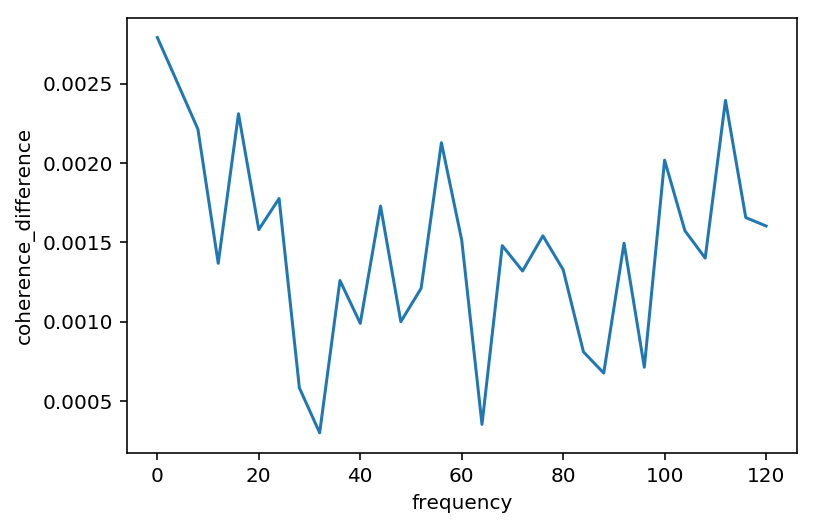

In [4]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
neuron_id1 = n.query('area == "PFC"').neuron_id.values
neuron_id2 = n.query('area == "CA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=neuron_id1, neuron2=neuron_id2)
coherence_difference.mean(['session', 'neuron1', 'neuron2']).plot()

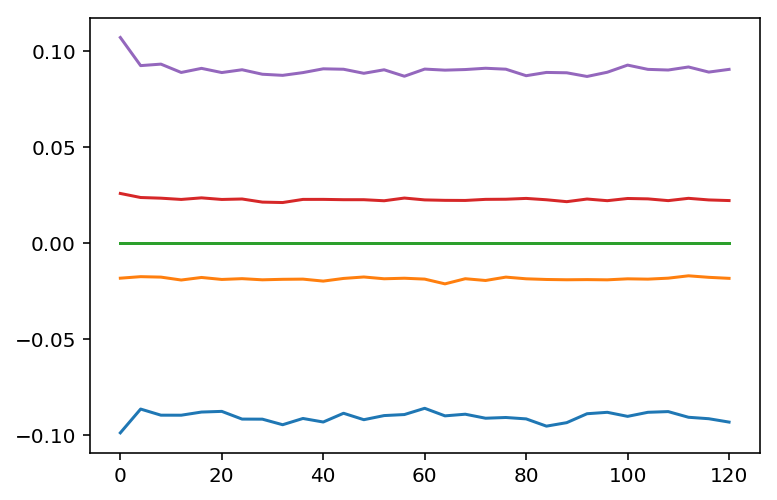

In [7]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
pfc_neuron_id = n.query('area == "PFC"').neuron_id.values
ca1_neuron_id = n.query('area == "CA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=pfc_neuron_id, neuron2=ca1_neuron_id)
q = coherence_difference.compute().quantile([0.025, .25, 0.5, 0.75, 0.975], ['session', 'neuron1', 'neuron2']).values

plt.plot(coherence_difference.frequency, q.T);

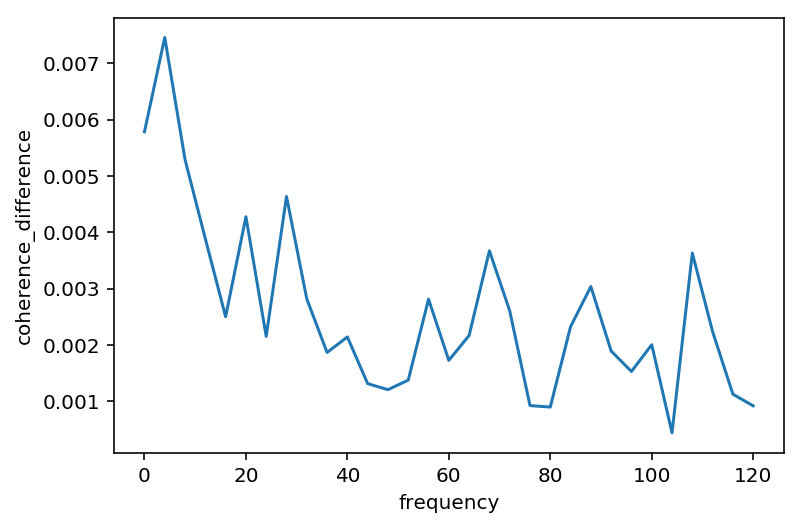

In [12]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
neuron_id1 = n.query('area == "iCA1"').neuron_id.values
neuron_id2 = n.query('area == "CA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=neuron_id1, neuron2=neuron_id2)
coherence_difference.mean(['session', 'neuron1', 'neuron2']).plot()

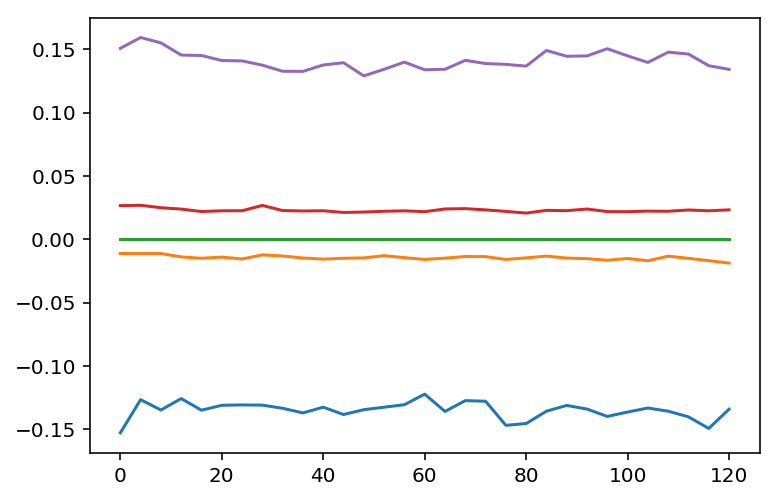

In [5]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
pfc_neuron_id = n.query('area == "iCA1"').neuron_id.values
ca1_neuron_id = n.query('area == "CA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=pfc_neuron_id, neuron2=ca1_neuron_id)
q = coherence_difference.compute().quantile([0.025, .25, 0.5, 0.75, 0.975], ['session', 'neuron1', 'neuron2']).values

plt.plot(coherence_difference.frequency, q.T);

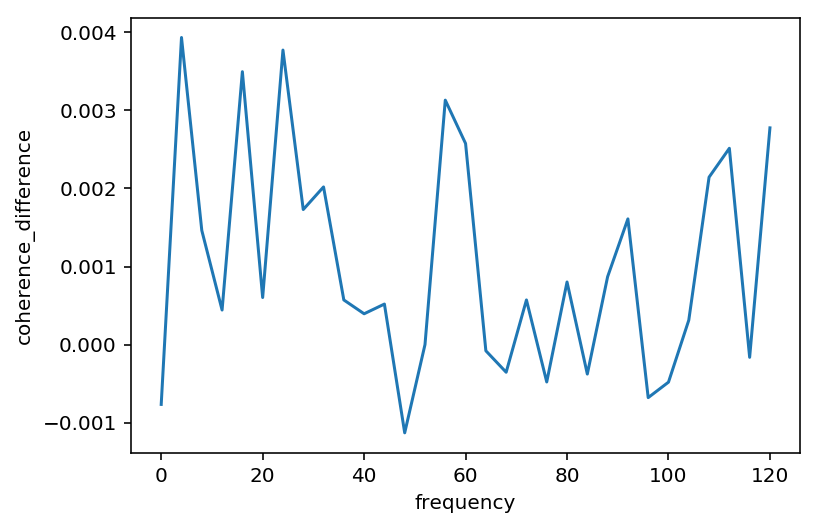

In [13]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
neuron_id1 = n.query('area == "PFC"').neuron_id.values
neuron_id2 = n.query('area == "iCA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=neuron_id1, neuron2=neuron_id2)
coherence_difference.mean(['session', 'neuron1', 'neuron2']).plot()

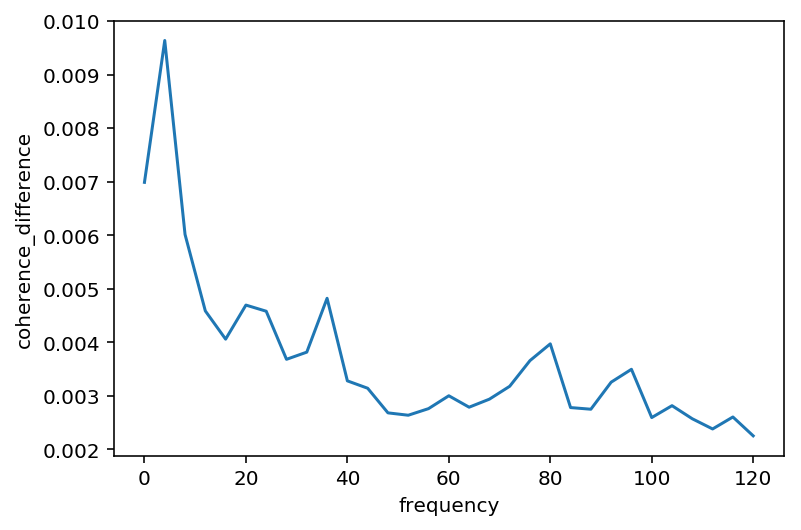

In [14]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
neuron_id1 = n.query('area == "CA1"').neuron_id.values
neuron_id2 = n.query('area == "CA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=neuron_id1, neuron2=neuron_id2)
coherence_difference.mean(['session', 'neuron1', 'neuron2']).plot()

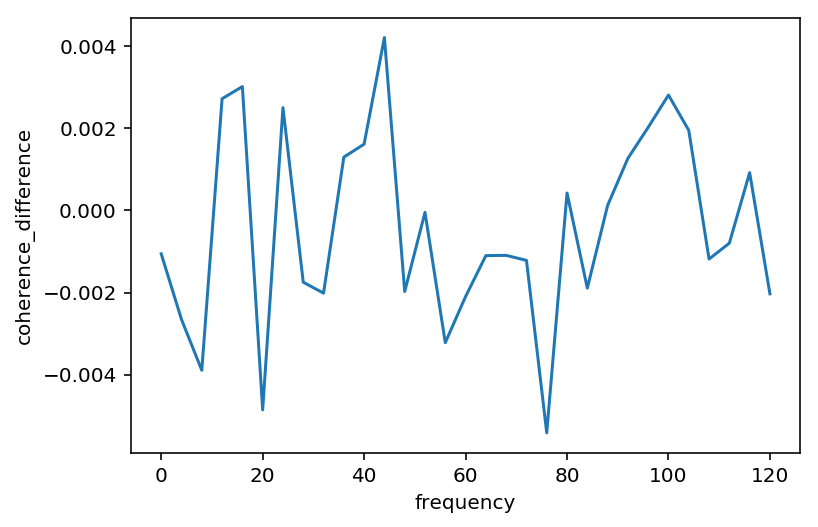

In [15]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
neuron_id1 = n.query('area == "iCA1"').neuron_id.values
neuron_id2 = n.query('area == "iCA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=neuron_id1, neuron2=neuron_id2)
coherence_difference.mean(['session', 'neuron1', 'neuron2']).plot()

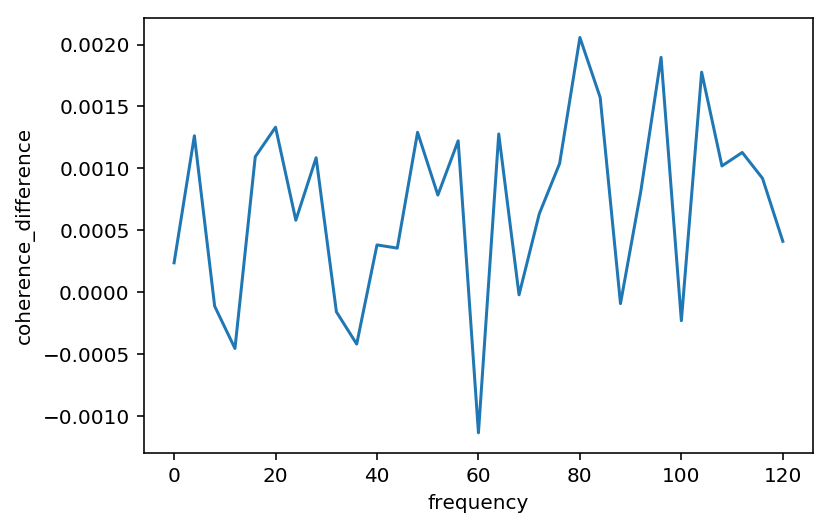

In [16]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
neuron_id1 = n.query('area == "PFC"').neuron_id.values
neuron_id2 = n.query('area == "PFC"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=neuron_id1, neuron2=neuron_id2)
coherence_difference.mean(['session', 'neuron1', 'neuron2']).plot()

In [ ]:
n = neuron_info.loc[neuron_info.neuron_id.isin(spike_coherence.neuron1.values)]
pfc_neuron_id = n.query('area == "CA1"').neuron_id.values
ca1_neuron_id = n.query('area == "CA1"').neuron_id.values

coherence_difference = spike_coherence.coherence_difference.squeeze().sel(
    frequency=slice(0, 120),
    neuron1=pfc_neuron_id, neuron2=ca1_neuron_id)
q = coherence_difference.compute().quantile([0.025, .25, 0.5, 0.75, 0.975], ['session', 'neuron1', 'neuron2']).values

plt.plot(coherence_difference.frequency, q.T);